## List of algorithms:
- Decision trees
- K-nearest neighbours
- Naive Bayes
- Logistic regression

## Current list of user's features:
### Instagram:
- <b> Followings counter </b>
- <b> Followers counter </b>
- <b> Medias counter  </b>
- <b> Average number of likes per media  </b>
- <b> Average number of comments per media  </b>
- <b> Average delta in hours between media  </b>
- <b> Average lenght of caption  </b>
- Set of user's tags
- <b> Number of videos </b>
- <b> Average number of smileys in caption  </b>
- Set of user's filteres
- Frequency for every filter

### VK
- <b> Age groups </b>
    - X < 15
    - 15 < X < 25
    - 25 < X < 35
    - 35 < X < 45
    - X < 45
- <b> Sex </b>
    - Male = 2, Female = 1
- <b> Age </b> 
- List of interests
- Attitude to smoking
- Attitude to alcogol
- Current relationships

## Helpful articles
http://kukuruku.co/hub/python/introduction-to-machine-learning-with-python-andscikit-learn

http://bigdataexaminer.com/uncategorized/how-to-run-linear-regression-in-python-scikit-learn/

http://blog.gramant.ru/2012/06/06/f1-measure/

https://www.creighton.edu/fileadmin/user/HSL/docs/ref/Searching_-_Recall_Precision.pdf

In [1]:
from env_data import *
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import matplotlib
from scipy import polyval, polyfit
import matplotlib.patches as mpatches
from pymongo import MongoClient
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (30.0, 15.0)
matplotlib.rcParams.update({'font.size' : 15})

### Feature engineering

In [2]:
ages = list_ages()
followers = count_followers()
followings = count_followings()
media = count_media()
likes = average_likes()
comments = average_comments()
usernames = list_usernames()
sex = list_sex()
caption_lenght = average_lenght_caption()
smileys = average_smileys()
frequency = media_frequency()
video = video_number()
age_classes = list_ages_classes()

dataset = pd.DataFrame(zip(usernames, ages, followers, followings, media, likes, comments, 
                           sex, caption_lenght, smileys, frequency, video, age_classes), 
                       columns = ["Username", "Ages", "Followers", "Followings", "Medias", 
                                  "Average likes", "Average comments", "Sex", "Average caption len",
                                 "Average smileys", "Media frequency", "Video frequency",
                                 "Age classes"])
dataset.tail()

,Username,Ages,Followers,Followings,Medias,Average likes,Average comments,Sex,Average caption len,Average smileys,Media frequency,Video frequency,Age classes
1346,nikita_fourth,18.0,72.0,116.0,55.0,5.000000,0.000000,1.0,31.333333,0.000000,27.000000,0.0,1.0
1347,appreciate_the_moment,16.0,122.0,155.0,43.0,55.916667,0.750000,0.0,233.833333,0.833333,374.727273,0.0,1.0
1348,_pixie_99,17.0,64.0,46.0,54.0,21.083333,0.166667,0.0,0.000000,0.000000,194.000000,1.0,1.0
1349,_burhovetskaya_,21.0,462.0,666.0,778.0,64.416667,0.916667,0.0,0.000000,0.000000,95.727273,0.0,1.0
1350,igor_smirnov_42,18.0,132.0,82.0,128.0,51.916667,1.583333,1.0,144.500000,0.500000,256.818182,0.0,1.0


### Histograms

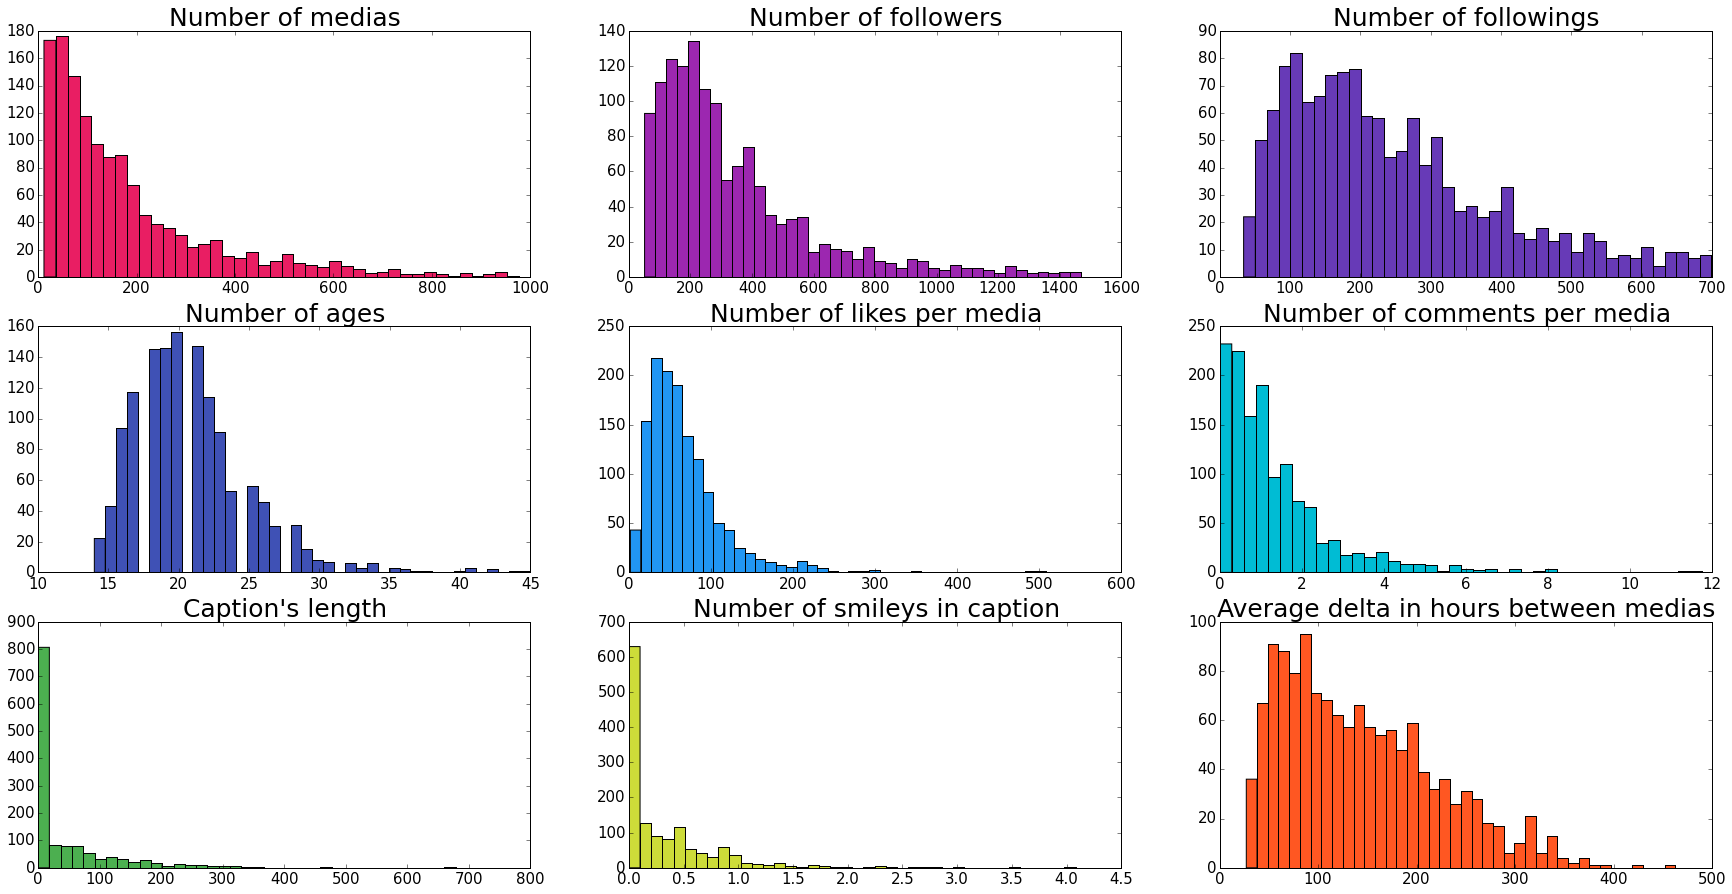

In [3]:
fig = plt.figure()

media_hist = fig.add_subplot(331)
media_hist.hist(dataset["Medias"], bins = 40, color = "#E91E63")
media_hist.set_title("Number of medias", fontsize = 25)

follower_hist = fig.add_subplot(332)
follower_hist.hist(dataset["Followers"], bins = 40, color = "#9C27B0")
follower_hist.set_title("Number of followers", fontsize = 25)

following_hist = fig.add_subplot(333)
following_hist.hist(dataset["Followings"], bins = 40, color = "#673AB7")
following_hist.set_title("Number of followings", fontsize = 25)

ages_hist = fig.add_subplot(334)
ages_hist.hist(dataset["Ages"], bins = 40, color = "#3F51B5")
ages_hist.set_title("Number of ages", fontsize = 25)

likes_hist = fig.add_subplot(335)
likes_hist.hist(dataset["Average likes"], bins = 40, color = "#2196F3")
likes_hist.set_title("Number of likes per media", fontsize = 25)

likes_hist = fig.add_subplot(336)
likes_hist.hist(dataset["Average comments"], bins = 40, color = "#00BCD4")
likes_hist.set_title("Number of comments per media", fontsize = 25)

caption_len_hist = fig.add_subplot(337)
caption_len_hist.hist(dataset["Average caption len"], bins = 40, color = "#4CAF50")
caption_len_hist.set_title("Caption's length", fontsize = 25)

smileys_hist = fig.add_subplot(338)
smileys_hist.hist(dataset["Average smileys"], bins = 40, color =
                  "#CDDC39")
smileys_hist.set_title("Number of smileys in caption", fontsize = 25)

frequency_hist = fig.add_subplot(339)
frequency_hist.hist(dataset["Media frequency"], bins = 40, color = "#FF5722")
frequency_hist.set_title("Average delta in hours between medias", fontsize = 25)

plt.show()

### Age's classes